In [1]:
import pandas as pd
# import numpy as np
# import datetime
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from utils import helper_funtions


In [2]:
pd.options.display.max_columns = None  # Remove "dots" from display when printing dataframes

In [3]:
PATH = helper_funtions.get_path()

# Read data

In [4]:
df = pd.read_csv(PATH + 'data/data_cleaning.csv')
df.sample(n=5).head()

,UUID_client,Age,Location,Income,TAX,Previous_sales,Type_products,Contact_channel,Contact_hour,Num_contacts,Satisfaction_score,Sales
33,c64e6ce6-4549-5b73-ab53-6746ec8714af,48,FL,47778.0,7166.70,1,B,Email,07:30:00,7,2,0
321,8e142862-7fa5-53f8-b0b2-8a8faef53ee7,49,FL,49169.0,7375.35,6,C,Online Chat,09:30:00,4,5,1
739,a1298a19-0249-5d08-a7d5-b55e35beb62e,53,NY,52669.0,7900.35,0,C,Email,15:00:00,9,2,0
97,07598200-e09a-5685-972e-a8a44cafdb43,31,NY,95661.0,14349.15,1,B,Email,05:30:00,2,5,0
965,352f9ada-cddf-5589-a184-c1448192d88f,23,NY,34493.0,5173.95,4,C,Phone,12:30:00,1,1,1


# EDA

## Describe data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   UUID_client         1000 non-null   object 
 1   Age                 1000 non-null   int64  
 2   Location            1000 non-null   object 
 3   Income              996 non-null    float64
 4   TAX                 996 non-null    float64
 5   Previous_sales      1000 non-null   int64  
 6   Type_products       1000 non-null   object 
 7   Contact_channel     1000 non-null   object 
 8   Contact_hour        1000 non-null   object 
 9   Num_contacts        1000 non-null   int64  
 10  Satisfaction_score  1000 non-null   int64  
 11  Sales               1000 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 93.9+ KB


In [6]:
df.describe()

,Age,Income,TAX,Previous_sales,Num_contacts,Satisfaction_score,Sales
count,1000.000000,996.000000,996.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,41.191000,63100.329317,9465.049398,2.052000,3.492000,2.558000,0.269000
std,12.259234,21638.692537,3245.803881,2.635952,2.399102,1.331318,0.443662
min,18.000000,5000.000000,750.000000,-7.000000,1.000000,1.000000,0.000000
25%,31.000000,46277.750000,6941.662500,0.000000,2.000000,1.000000,0.000000
50%,40.500000,62770.500000,9415.575000,1.000000,3.000000,2.000000,0.000000
75%,51.000000,80618.000000,12092.700000,4.000000,5.000000,3.000000,1.000000
max,125.000000,165355.000000,24803.250000,25.000000,33.000000,5.000000,1.000000


In [7]:
print('Suma de valores faltantes en el conjunto de datos:')
df.isnull().sum()

Suma de valores faltantes en el conjunto de datos:


UUID_client           0
Age                   0
Location              0
Income                4
TAX                   4
Previous_sales        0
Type_products         0
Contact_channel       0
Contact_hour          0
Num_contacts          0
Satisfaction_score    0
Sales                 0
dtype: int64

Observaciones:
1. La cantidad de compras que el cliente ha realizado en el pasado cuenta con valores negativos lo que no corresponde con un registro lógico.
2. Existen usuarios con edades mayores a 70 años que parecen ser datos incorrectos
3. Existen 181 usuarios con interacciones superiores a cinco, de las cuales, una alcanza las 33 interacciones.
4. La mitad de la muestra califica la satisfacción entre un nivel uno y dos (muy bajo).
5. Al menos la mitad de los clientes no tuvieron una venta efectiva.

## Preprocesing for dataviz

In [8]:
# Delete missing data
df.dropna(inplace=True)

# Delete outliers
df = df.query("Age <= 70")
df = df.query("Previous_sales >= 0")
df = df.query("Num_contacts <= 5")

## Visualization

### Categorical data

In [9]:
categorical_columns = [
    'Location', 'Type_products', 'Contact_channel',
    'Satisfaction_score', 'Sales'
]
fig = make_subplots(rows=5, cols=1, subplot_titles=categorical_columns)
row, col = 1, 1
for column in categorical_columns:
    helper_funtions.dataviz_structure_categorical(column, fig, df, row, col)
    row += 1
fig.update_layout(height=800, width=750, title_text='Variables categóricas')
fig.show()

Observaciones:
1. La distribución de ubicaciones es homogenea.
2. No parece existir un tipo de producto preferido por los clientes.
3. El canal de preferencia de contacto del cliente es el teléfono.
4. Los niveles de satisfacción son bajos a nivel de muestra.
5. la efectividad de ventas es baja (variable desvalanceada).

### Numerical data

In [10]:
numerical_columns_histogram = [
    'Previous_sales', 'Num_contacts'
]

fig = go.Figure()
for column in numerical_columns_histogram:
    fig.add_trace(go.Histogram(x=df[column], name=column))
fig.update_layout(barmode='stack')
fig.show()

In [11]:
# Determine peak times by rounding the time in groups of one hour 
df['Contact_hour'] = pd.to_datetime(df['Contact_hour'], format='%H:%M:%S')
df['Contact_hour_round'] = df['Contact_hour'].apply(lambda x: x.round('60 min'))

numerical_columns_histogram_hour = [
    'Contact_hour_round', 'Contact_hour'
]

fig = go.Figure()
for column in numerical_columns_histogram_hour:
    fig.add_trace(go.Histogram(x=df[column], name=column))
fig.update_layout(barmode='stack')
fig.show()

In [12]:
numerical_columns_boxplot = [
    'Age', 'Income', 'TAX', 'Previous_sales'
    ]

fig = make_subplots(rows=4, cols=1, subplot_titles=numerical_columns_boxplot)
row, col = 1, 1
for i in range(len(numerical_columns_boxplot)):
    column = numerical_columns_boxplot[i]
    helper_funtions.dataviz_structure_numerical(column, fig, df, row, col)
    row += 1
fig.update_layout(height=2000, width=500, title_text='Variables Numéricas')
fig.show()

Observaciones:
1. Pese a la existencia de compras negativas en el conjunto de datos (a ajustar en el procesamiento) se evidencia una asimetría positiva.
2. El número de intentos de contacto realizados por el cliente cuenta con una asimetría positiva.
3. Se evidencian puntos pico a determinadas horas del día.
4. Existen valores atípicos que deben ser considerados durante la etapa de procesamiento de datos.

# Univariate analysis

In [13]:
helper_funtions.conversion_rate_chart('Age', 'Sales', df)

df.loc[:,'groups_ages'] = '18-20'
df.loc[df['Age']>60,'groups_ages'] = '>60'
df.loc[(df['Age']>50)&(df['Age']<=60), 'groups_ages'] = '51-60'
df.loc[(df['Age']>40)&(df['Age']<=50), 'groups_ages'] = '41-50'
df.loc[(df['Age']>30)&(df['Age']<=40), 'groups_ages'] = '31-40'
df.loc[(df['Age']>20)&(df['Age']<=30), 'groups_ages'] = '20-30'

# Y grafiquemos la tasa de conversión para esta nueva columna
helper_funtions.conversion_rate_chart('groups_ages', 'Sales', df, type='bar')

In [14]:
# helper_funtions.conversion_rate_chart('Income', 'Sales', df, type='scatter')

df.loc[:,'groups_income'] = "<0"
df.loc[(df['Income']>=0) & (df['Income']<40000),'groups_income'] = "0-40K"
# df.loc[(df['Income']>=20000) & (df['Income']<40000),'groups_income'] = "20K-40K"
df.loc[(df['Income']>=40000) & (df['Income']<80000),'groups_income'] = "40K-80K"
# df.loc[(df['Income']>=60000) & (df['Income']<80000),'groups_income'] = "60K-80K"
df.loc[(df['Income']>=80000) & (df['Income']<100000),'groups_income'] = "80K-100K"
df.loc[df['Income']>=100000,'groups_income'] = ">100K"

helper_funtions.conversion_rate_chart('groups_income', 'Sales', df, type='bar')

In [15]:
helper_funtions.conversion_rate_chart('Previous_sales', 'Sales', df,)

In [16]:
helper_funtions.conversion_rate_chart('Contact_channel', 'Sales', df, type='bar')
helper_funtions.conversion_rate_chart('Satisfaction_score', 'Sales', df, type='bar')
helper_funtions.conversion_rate_chart('Contact_hour_round', 'Sales', df, type='bar')

despreciables:

a tener en cuenta:
1. Type_products (40.1%)

decir: 
1. contacten por telefono y chat (>43.2%)
2. Los tres horarios de contacto para obtener una tasa de conversión superior a al 50% son 08:00 AM (52.9%), 03:00 PM (52.8%) y 02:00 PM (50.7%); seguido por los horarios 04:00PM (46.4%) y 10:00 AM (45.7%)
3. mantengan contentos a los clientes ya que un cliente satisfecho (4 o 5) tiene una tasa de conversión de adquirir superior al 46% (53.2% si está muy satisfecho)
4. Los clientes con compras previas tienen, en promedio, una tasa superior al 50%. Sin embargo, existe una oprtunidad de mejora en la Experiencia de Usuario entre la sexta y novena compra (decreciente), por lo que se sugiere la creación de planes especiales en el rango de 5-10 compras previas para enfrentar dicha tendencia a la baja
5. Cuando los ingresos del cliente están entre 80K-100K existe una tasa de conversión superior al 40.3%


# Vibariate analysis

In [17]:
# columns_change_type_list = [
#     'Age', 'Income', 'TAX', 'Previous_sales', 'Num_contacts',
#     'Satisfaction_score', 'Contact_hour_round'
#     ]
# for column in columns_change_type_list:
#     df[column].astype(str)

1. de 2 a 4 es buena estrategia contactar a clientes por medio del chat online
2. las 8 am suele ser la hora adefcuada para hacerlo por teléfono
3. Los clientes con un nivel de satisfaccion de 5 deben ser contactados entre las 3-4 pm

d:\Proyectos\Teleperformance\TP_Technical_test_DS\src\utils\helper_funtions.py:69: UserWarning:



The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.




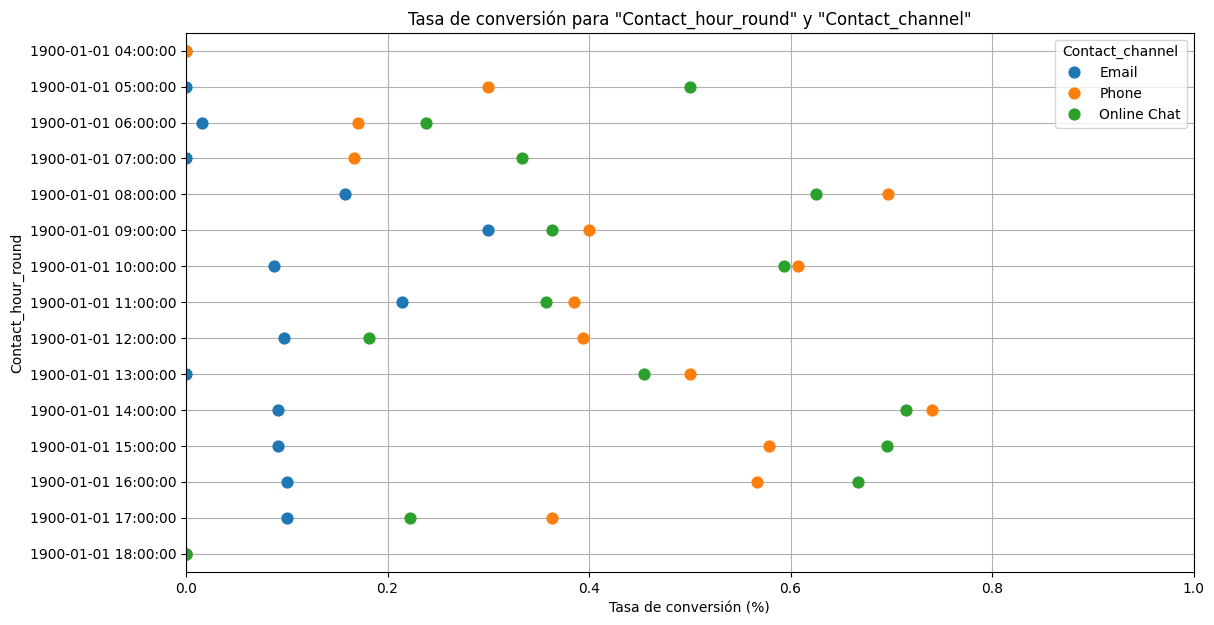

In [18]:
helper_funtions.graficar_tc_bivariada(['Contact_hour_round','Contact_channel'], df)

d:\Proyectos\Teleperformance\TP_Technical_test_DS\src\utils\helper_funtions.py:69: UserWarning:



The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.




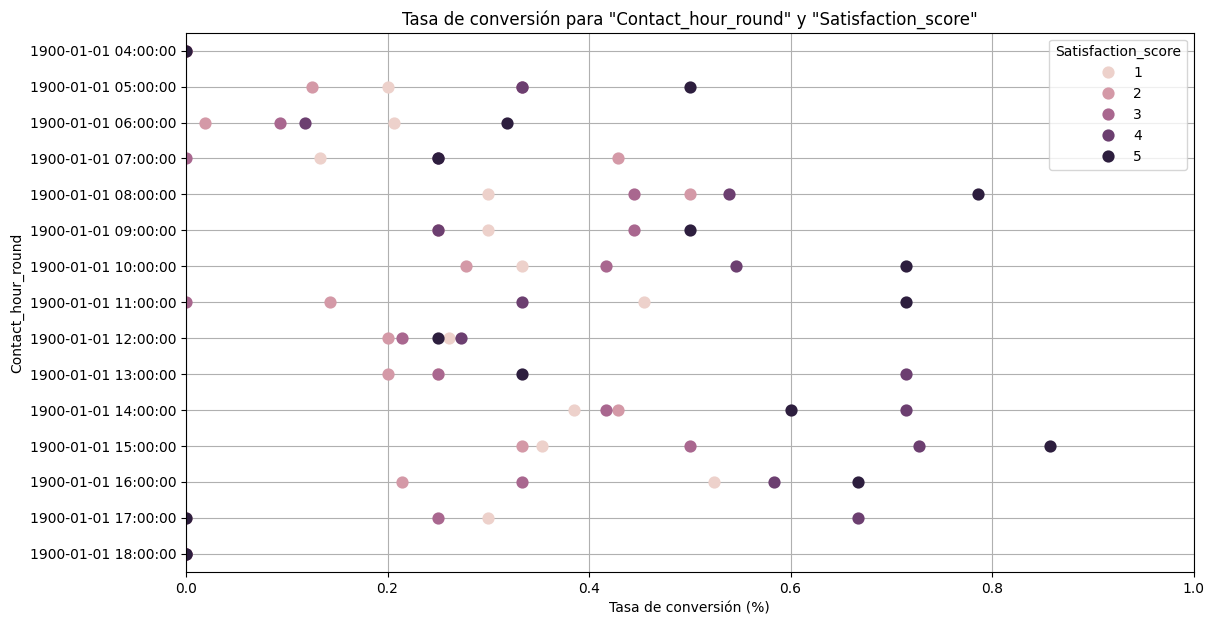

In [19]:
helper_funtions.graficar_tc_bivariada(['Contact_hour_round','Satisfaction_score'], df)